# Mapping
- Visualize Demand ⇒ RED, using “TractLOWI” as population data, by zip-code area
    - Very high risk: “LILATracts_halfAnd10”
    - High risk: “LILATracts_1And10”
    - Mid risk: “LILATracts_1And20”
    - Other: “LowIncomeTracts”

## Preparation

In [1]:
# to read and visualize spatial data
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

Duplicate key in file PosixPath('/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 768 ('font.family: IPAexGothic')


In [2]:
# df_bound is for boundary plotting
path = "./geo_data/tl_2021_us_county/tl_2021_us_county.shp" # from https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2021&layergroup=Counties+%28and+equivalent%29
df_bound = gpd.read_file(path)
df_bound = df_bound.to_crs("EPSG:4326")

# All US -> Only PA
df_bound = df_bound[df_bound["STATEFP"] == "42"]
# All PA -> Only the 11 counties
df_bound = df_bound[df_bound["NAME"].isin(["Allegheny", "Armstrong", "Beaver", "Butler", "Cambria", 
                                           "Fayette", "Greene", "Indiana", "Lawrence", "Somerset", "Washington"])]

## Import geo data
You need to select the geo-data for your regional unit.  
(e.g.) If you have data by **zip code**, you have to select geo-data for zip code.

Zip code data is large, so it may take some time to load.

In [3]:
# Geodata of PA by Zipcode
path = "./geo_data/tl_2021_us_zcta520/tl_2021_us_zcta520.shp"
df_geo = gpd.read_file(path)
df_geo = df_geo.to_crs("EPSG:4326")

In [4]:
# Delete unnecessary columns
df_geo = df_geo[["ZCTA5CE20", "geometry"]]

In [5]:
# Change dtype
df_geo = df_geo.astype({'ZCTA5CE20': int})

## Import Demand Data


In [251]:
# Read Demand Data
df = pd.read_csv("./data/USDA_cleandata_OnlyGpcfbArea_2.csv") 

In [252]:
# Check data
df.head()

CensusTract            County  LILATracts_1And10  LILATracts_halfAnd10  \
0  42003010300  Allegheny County                  0                     1   
1  42003020100  Allegheny County                  0                     0   
2  42003020300  Allegheny County                  0                     0   
3  42003030500  Allegheny County                  0                     0   
4  42003040200  Allegheny County                  0                     1   

   LILATracts_1And20  LowIncomeTracts  PovertyRate  TractLOWI  \
0                  0                1         46.1        540   
1                  0                0         17.5        990   
2                  0                0          6.4        102   
3                  0                1         39.5       1588   
4                  0                1         47.9        887   

   Total_Population  
0              4221  
1              4874  
2               315  
3              2693  
4              2242

In [253]:
df.dtypes

CensusTract               int64
County                   object
LILATracts_1And10         int64
LILATracts_halfAnd10      int64
LILATracts_1And20         int64
LowIncomeTracts           int64
PovertyRate             float64
TractLOWI                 int64
Total_Population          int64
dtype: object

## Converting CensusTract -> Zip

In [254]:
# Data for convert
df_cen_zip = pd.read_csv("./geo_data/ZIP_TRACT_122021.csv")

In [255]:
df_cen_zip = df_cen_zip[["zip", "tract"]]

In [256]:
df_cen_zip.dtypes

zip      int64
tract    int64
dtype: object

In [257]:
# merge, key=CensusTract
df_demand = pd.merge(df, df_cen_zip, left_on='CensusTract', right_on='tract')

In [258]:
df_demand.head()

CensusTract            County  LILATracts_1And10  LILATracts_halfAnd10  \
0  42003010300  Allegheny County                  0                     1   
1  42003020100  Allegheny County                  0                     0   
2  42003020100  Allegheny County                  0                     0   
3  42003020100  Allegheny County                  0                     0   
4  42003020100  Allegheny County                  0                     0   

   LILATracts_1And20  LowIncomeTracts  PovertyRate  TractLOWI  \
0                  0                1         46.1        540   
1                  0                0         17.5        990   
2                  0                0         17.5        990   
3                  0                0         17.5        990   
4                  0                0         17.5        990   

   Total_Population    zip        tract  
0              4221  15219  42003010300  
1              4874  15222  42003020100  
2              4874  15272  42003020100  
3              4874  15262  42003020100  
4              4874  15259  42003020100

In [259]:
df_demand.dtypes

CensusTract               int64
County                   object
LILATracts_1And10         int64
LILATracts_halfAnd10      int64
LILATracts_1And20         int64
LowIncomeTracts           int64
PovertyRate             float64
TractLOWI                 int64
Total_Population          int64
zip                       int64
tract                     int64
dtype: object

In [260]:
# group zy zip
df_demand = df_demand.groupby('zip').sum()

In [261]:
df_demand.head()

CensusTract  LILATracts_1And10  LILATracts_halfAnd10  \
zip                                                            
15001  588102307708                  2                     3   
15003  336048354003                  3                     4   
15004   42125713700                  0                     0   
15005  294049031806                  0                     1   
15006   42003407002                  0                     0   

       LILATracts_1And20  LowIncomeTracts  PovertyRate  TractLOWI  \
zip                                                                 
15001                  2                4        198.3      12624   
15003                  3                4         80.5       5113   
15004                  0                0         14.0       1461   
15005                  0                1         30.9       4467   
15006                  0                0          6.6        989   

       Total_Population         tract  
zip                                    
15001             51540  588102307708  
15003             18641  336048354003  
15004              4567   42125713700  
15005             30185  294049031806  
15006              6883   42003407002

In [262]:
df_demand.shape

(524, 9)

In [263]:
# Drop 
df_demand = df_demand.drop("PovertyRate", axis=1)
df_demand = df_demand.drop("tract", axis=1)
df_demand = df_demand.drop("CensusTract", axis=1)

In [264]:
# Fix "LILATracts_1And10", "LILATracts_halfAnd10", "LILATracts_1And20", "LowIncomeTracts", 
conditions = [ df_demand['LILATracts_1And10'] >= 1 ]
choices = [1]
df_demand['LILATracts_1And10'] = np.select(conditions, choices, default=0) 

conditions = [ df_demand['LILATracts_halfAnd10'] >= 1 ]
choices = [1]
df_demand['LILATracts_halfAnd10'] = np.select(conditions, choices, default=0) 

conditions = [ df_demand['LILATracts_1And20'] >= 1 ]
choices = [1]
df_demand['LILATracts_1And20'] = np.select(conditions, choices, default=0) 

conditions = [ df_demand['LowIncomeTracts'] >= 1 ]
choices = [1]
df_demand['LowIncomeTracts'] = np.select(conditions, choices, default=0) 

In [265]:
# Add risk level column

conditions = [ df_demand['LILATracts_halfAnd10'] == 1 ]
choices = [3]
df_demand['Risk_Level'] = np.select(conditions, choices, default=0) 

conditions = [ df_demand['LILATracts_1And20'] == 1 ]
choices = [1]
df_demand['Risk_Level'] = np.select(conditions, choices, df_demand['Risk_Level']) 

conditions = [ df_demand['LILATracts_1And10'] == 1 ]
choices = [2]
df_demand['Risk_Level'] = np.select(conditions, choices, df_demand['Risk_Level'])

In [266]:
df_demand.describe()

LILATracts_1And10  LILATracts_halfAnd10  LILATracts_1And20  \
count         524.000000            524.000000         524.000000   
mean            0.219466              0.295802           0.219466   
std             0.414280              0.456838           0.414280   
min             0.000000              0.000000           0.000000   
25%             0.000000              0.000000           0.000000   
50%             0.000000              0.000000           0.000000   
75%             0.000000              1.000000           0.000000   
max             1.000000              1.000000           1.000000   

       LowIncomeTracts     TractLOWI  Total_Population  Risk_Level  
count       524.000000    524.000000        524.000000  524.000000  
mean          0.576336   3665.788168      15366.790076    0.667939  
std           0.494611   3612.804446      15792.134576    1.058717  
min           0.000000      0.000000        936.000000    0.000000  
25%           0.000000   1185.500000       4874.000000    0.000000  
50%           1.000000   2485.500000       9374.000000    0.000000  
75%           1.000000   4724.250000      19061.250000    2.000000  
max           1.000000  22192.000000      96031.000000    3.000000

## Merge Geo Data & Demand Data

In [267]:
# add geo-data
# df_geo = df_geo.astype({'ZCTA5CE20': int})
df_ = pd.merge(df_demand, df_geo, left_on="zip", right_on="ZCTA5CE20")

In [268]:
# pandas -> geopandas 
gdf = gpd.GeoDataFrame(df_, geometry='geometry') 

## Mapping

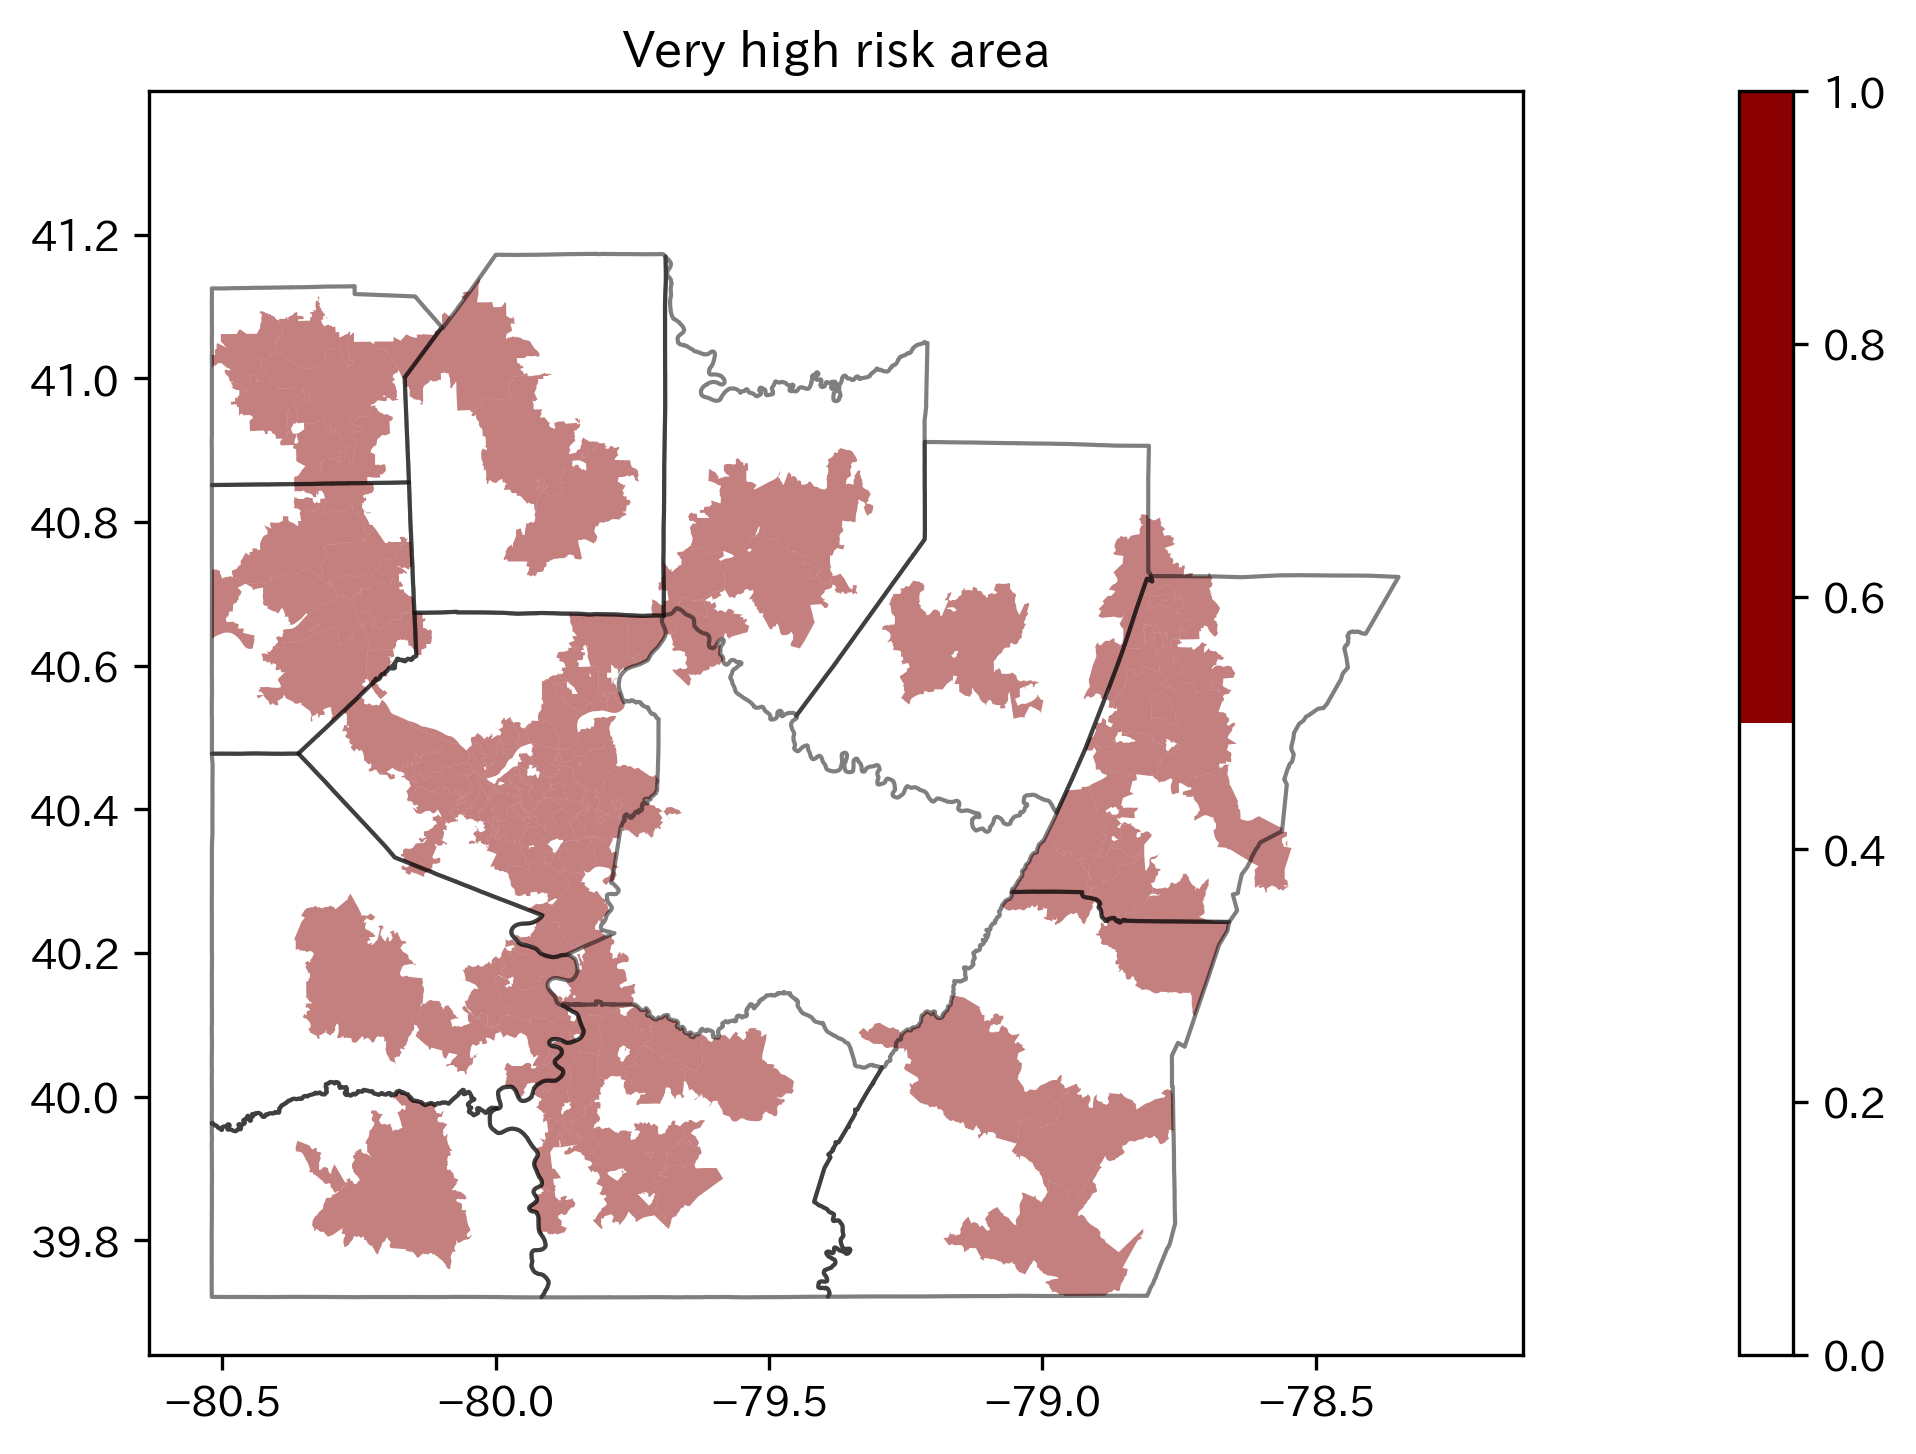

In [85]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Color map
cmap = ListedColormap(["white", "darkred"])

# Specify the data column name that you want to visualize in color.
data = "LILATracts_halfAnd10"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Very high risk area')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

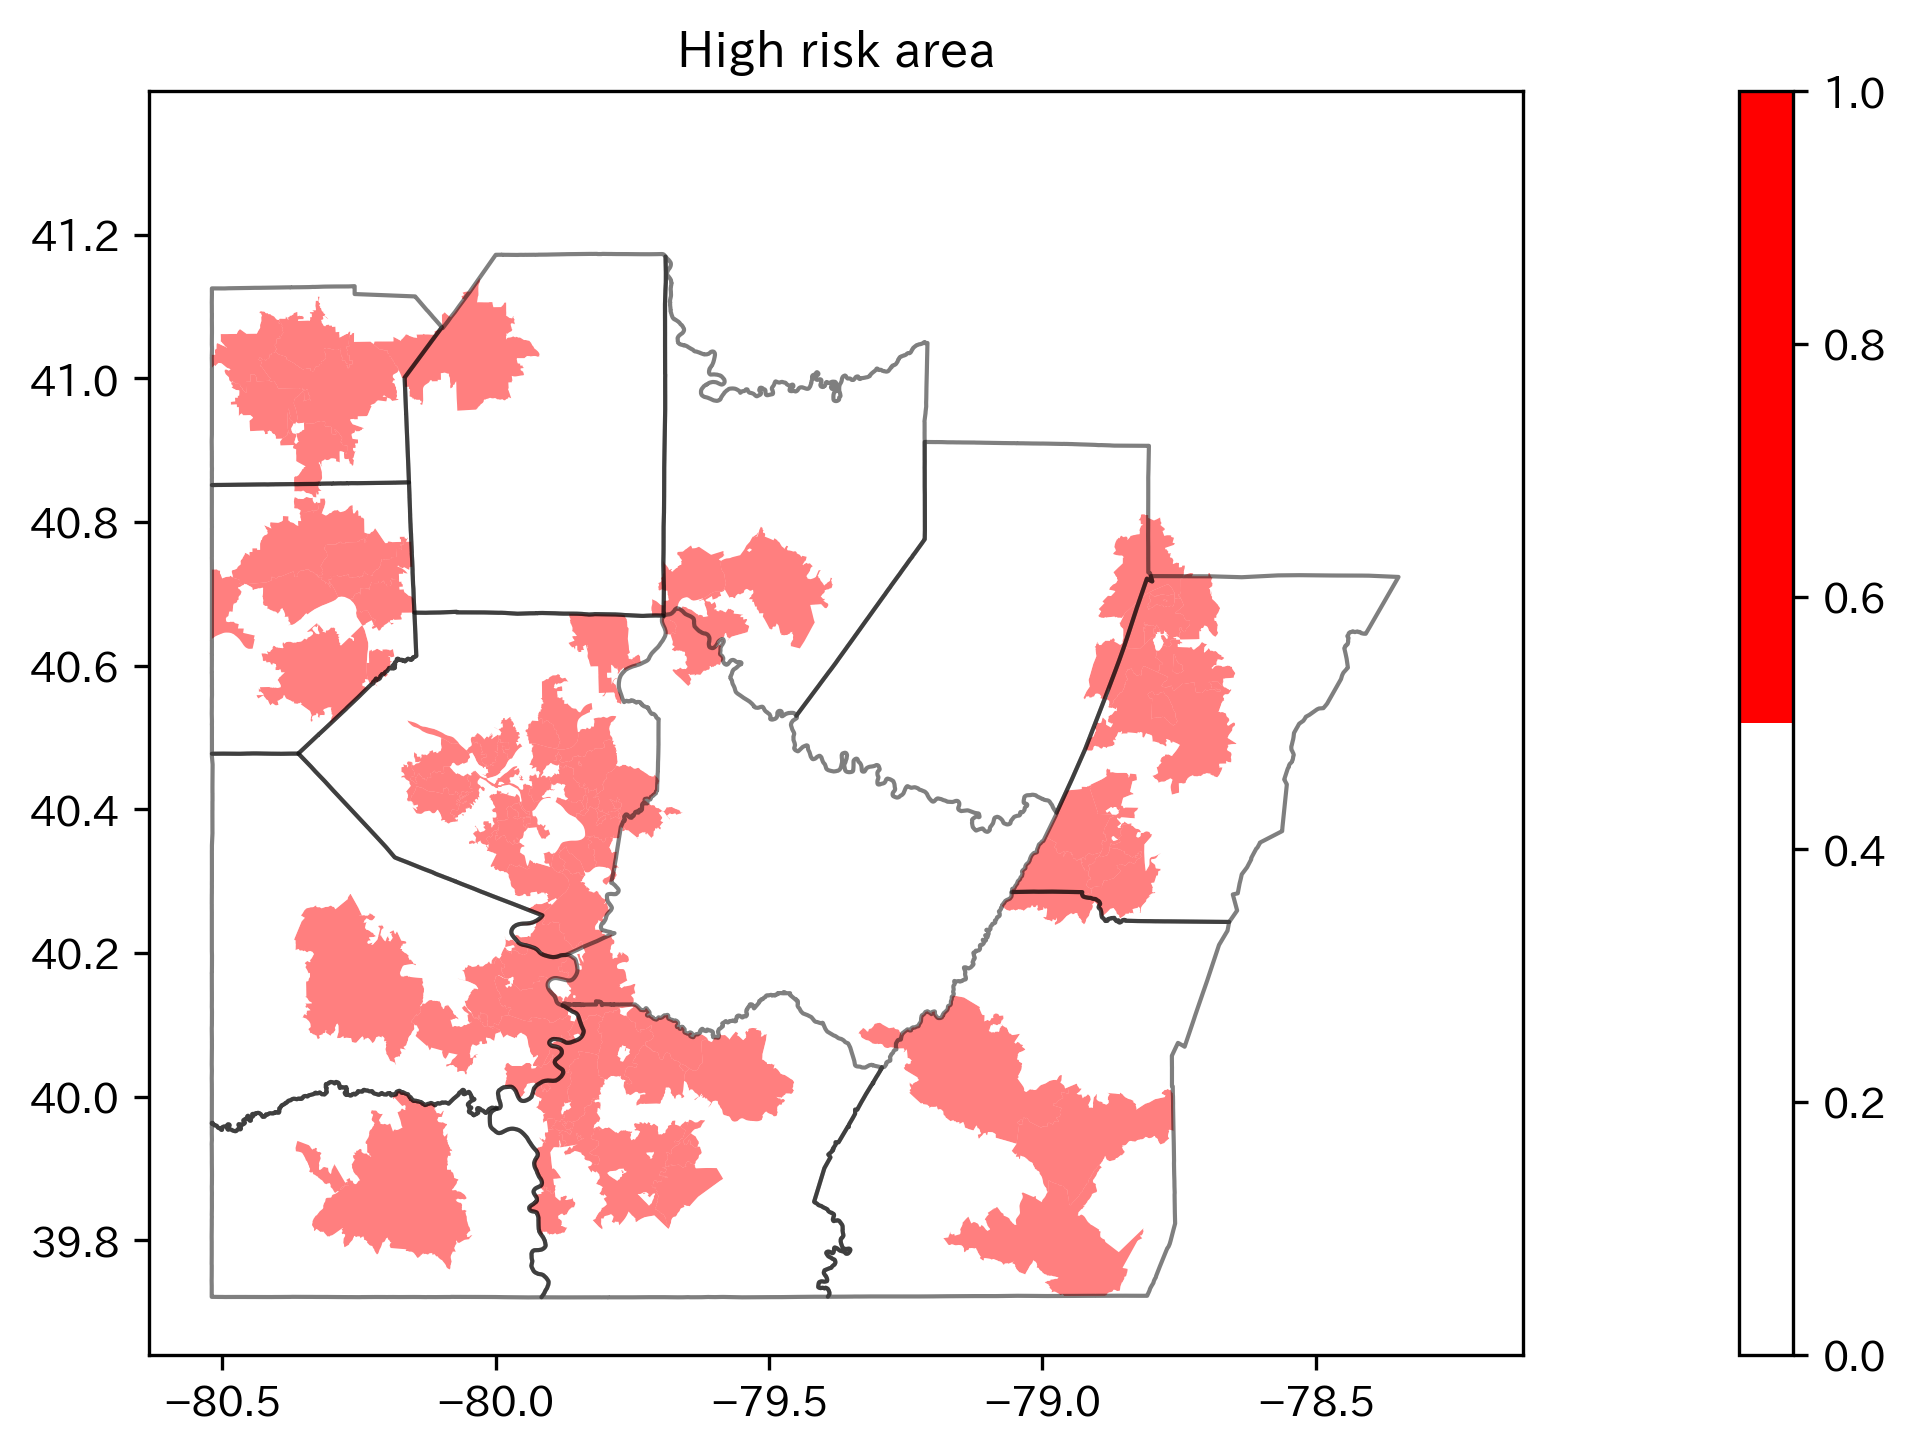

In [86]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Color map
cmap = ListedColormap(["white", "red"])


# Specify the data column name that you want to visualize in color.
data = "LILATracts_1And10"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('High risk area')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

In [87]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Color map
cmap = ListedColormap(["white", "orange"])

# Specify the data column name that you want to visualize in color.
data = "LILATracts_1And20"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Mid risk area')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

In [107]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Color mapping
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["white", "orange", "red", "darkred"])

# Specify the data column name that you want to visualize in color.
# data = "LILATracts_1And20"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Risk area')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot("Risk_Level", ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

In [96]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Color mapping
from matplotlib.colors import ListedColormap
darkred = ListedColormap(["white", "darkred"])
red = ListedColormap(["white", "red"])
orange = ListedColormap(["white", "orange"])

# Specify the data column name that you want to visualize in color.
# data = "LILATracts_1And20"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Risk area')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot("LILATracts_1And20", ax=ax, alpha=0.5, cmap=orange, edgecolor='k', legend=True, cax=cax, linewidth=0)
gdf.plot("LILATracts_1And10", ax=ax, alpha=0.5, cmap=red, edgecolor='k', legend=True, cax=cax, linewidth=0)
gdf.plot("LILATracts_halfAnd10", ax=ax, alpha=0.5, cmap=darkred, edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

In [271]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Low Income Population')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot("TractLOWI", ax=ax, alpha=0.5, cmap="Purples", edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

## Visualize Supply

In [343]:
# Read Demand Data
df = pd.read_csv("./data/FoodBank_Zip_Quantity.csv") 

In [344]:
# Check data
df.head()

Zip  ProductQuantity
0  15010               20
1  15424               10
2  16201              100
3  16201              100
4  16117               16

In [345]:
df.dtypes

Zip                object
ProductQuantity     int64
dtype: object

In [346]:
df = df.replace('15431-2007', '15431')
df = df.replace('15005-1716', '15005')
df = df.replace('15202-1730', '15202')
df = df.replace('17109-5928', '17109')

In [347]:
df = df.astype({'Zip': int})

In [348]:
# group by zip
df_ = df.groupby('Zip').sum()

In [330]:
# add geo-data
df_ = pd.merge(df_, df_geo[["ZCTA5CE20", "geometry"]], left_on="Zip", right_on="ZCTA5CE20")

In [349]:
df_ = df_.rename(columns={"ZCTA5CE20": "Zip"})

In [350]:
df_.head()

ProductQuantity
Zip                   
15001            20233
15003             8871
15004              174
15005              795
15010             8881

In [290]:
# pandas -> geopandas 
gdf = gpd.GeoDataFrame(df_, geometry='geometry') 

In [127]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Specify the data column name that you want to visualize in color.
data = "ProductQuantity"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Prepared Food Quantity')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap="Blues", edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

In [295]:
gdf.Zip.unique()

array([15001, 15003, 15004, 15005, 15010, 15014, 15022, 15024, 15025,
       15033, 15034, 15035, 15037, 15045, 15056, 15057, 15059, 15061,
       15063, 15065, 15068, 15074, 15076, 15084, 15088, 15090, 15101,
       15102, 15104, 15106, 15108, 15110, 15116, 15120, 15122, 15126,
       15129, 15131, 15132, 15133, 15136, 15137, 15139, 15140, 15144,
       15145, 15146, 15147, 15148, 15201, 15202, 15203, 15204, 15205,
       15206, 15207, 15208, 15209, 15210, 15211, 15212, 15213, 15214,
       15215, 15216, 15217, 15218, 15219, 15220, 15221, 15222, 15223,
       15224, 15226, 15227, 15228, 15229, 15233, 15235, 15236, 15237,
       15238, 15239, 15243, 15301, 15317, 15323, 15341, 15347, 15370,
       15412, 15417, 15419, 15423, 15424, 15425, 15431, 15475, 15501,
       15530, 15531, 15552, 15557, 15626, 15701, 15904, 15905, 15926,
       15935, 15963, 16001, 16023, 16033, 16037, 16050, 16057, 16059,
       16101, 16102, 16105, 16115, 16117, 16120, 16132, 16141, 16143,
       16156, 16201,

In [296]:
gdf = gdf[gdf["Zip"] != 17109]

In [137]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Specify the data column name that you want to visualize in color.
data = "ProductQuantity"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Prepared Food Quantity')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap="Blues", edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

In [138]:
gdf.describe()

Zip  ProductQuantity     ZCTA5CE20
count  62191.000000     62191.000000  62191.000000
mean   15290.693203        45.195848  15290.693203
std      293.477095       212.006667    293.477095
min    15001.000000      -425.000000  15001.000000
25%    15132.000000         2.000000  15132.000000
50%    15206.000000         6.000000  15206.000000
75%    15227.000000        20.000000  15227.000000
max    16646.000000     13336.000000  16646.000000

In [142]:
gdf[gdf["ProductQuantity"] >= 10000.000000]

Zip  ProductQuantity  ZCTA5CE20  \
25800  15024            10750      15024   
56951  15626            10232      15626   
57550  15061            13336      15061   

                                                geometry  
25800  POLYGON ((-79.89380 40.56931, -79.89380 40.569...  
56951  POLYGON ((-79.60480 40.40205, -79.60427 40.402...  
57550  POLYGON ((-80.40404 40.62720, -80.40196 40.629...

In [ ]:
#gdf = gdf[gdf["Zip"] != 15626]

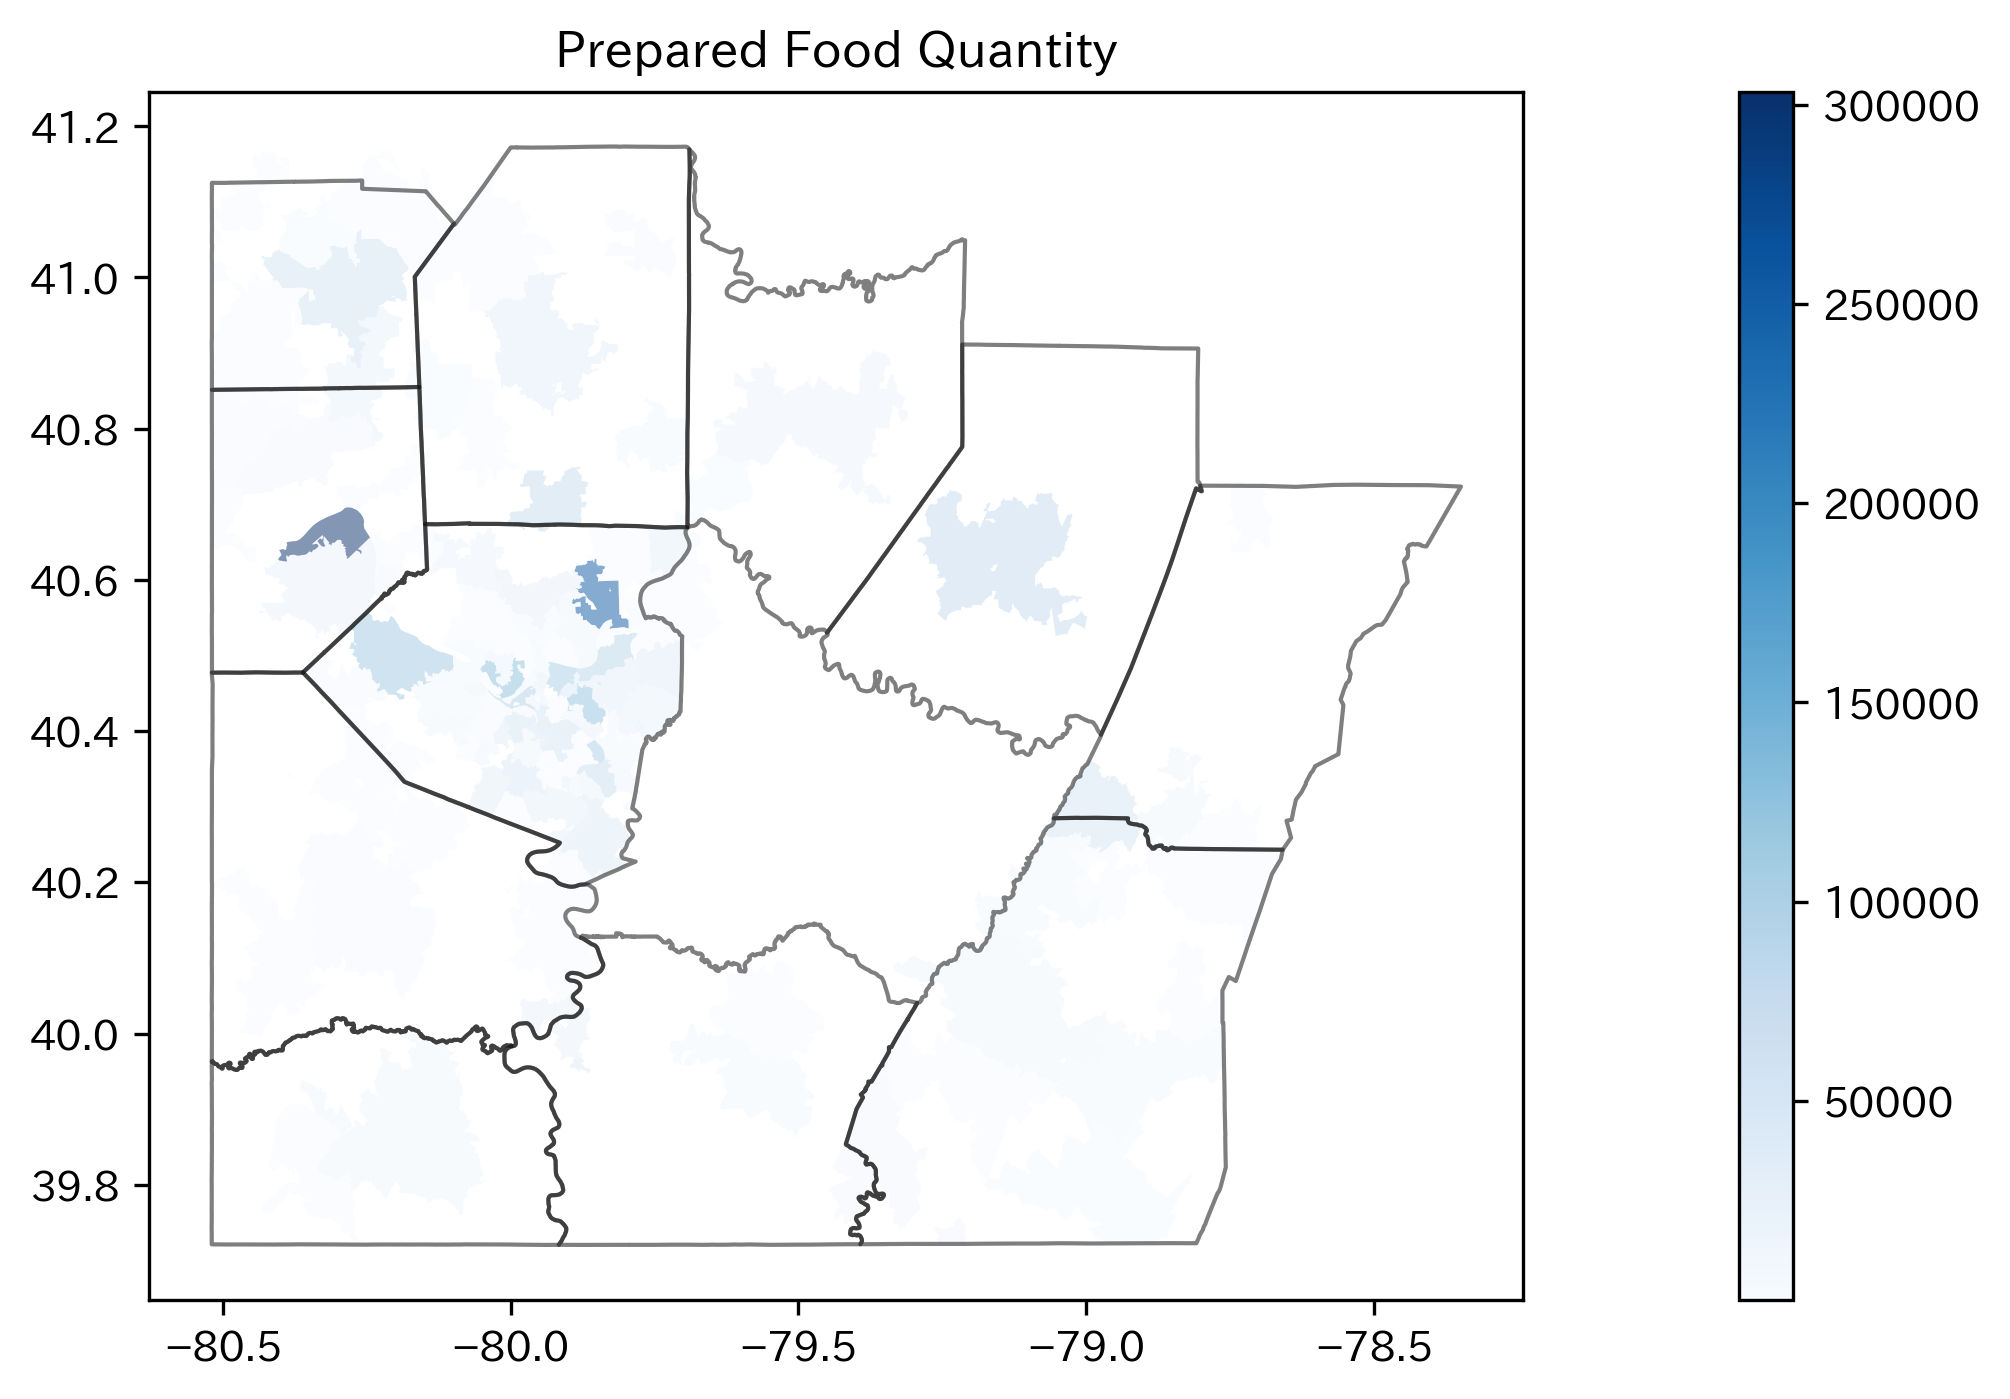

In [179]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Specify the data column name that you want to visualize in color.
data = "ProductQuantity"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Prepared Food Quantity')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf[gdf["Zip"] != 15626].plot(data, ax=ax, alpha=0.5, cmap="Blues", edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

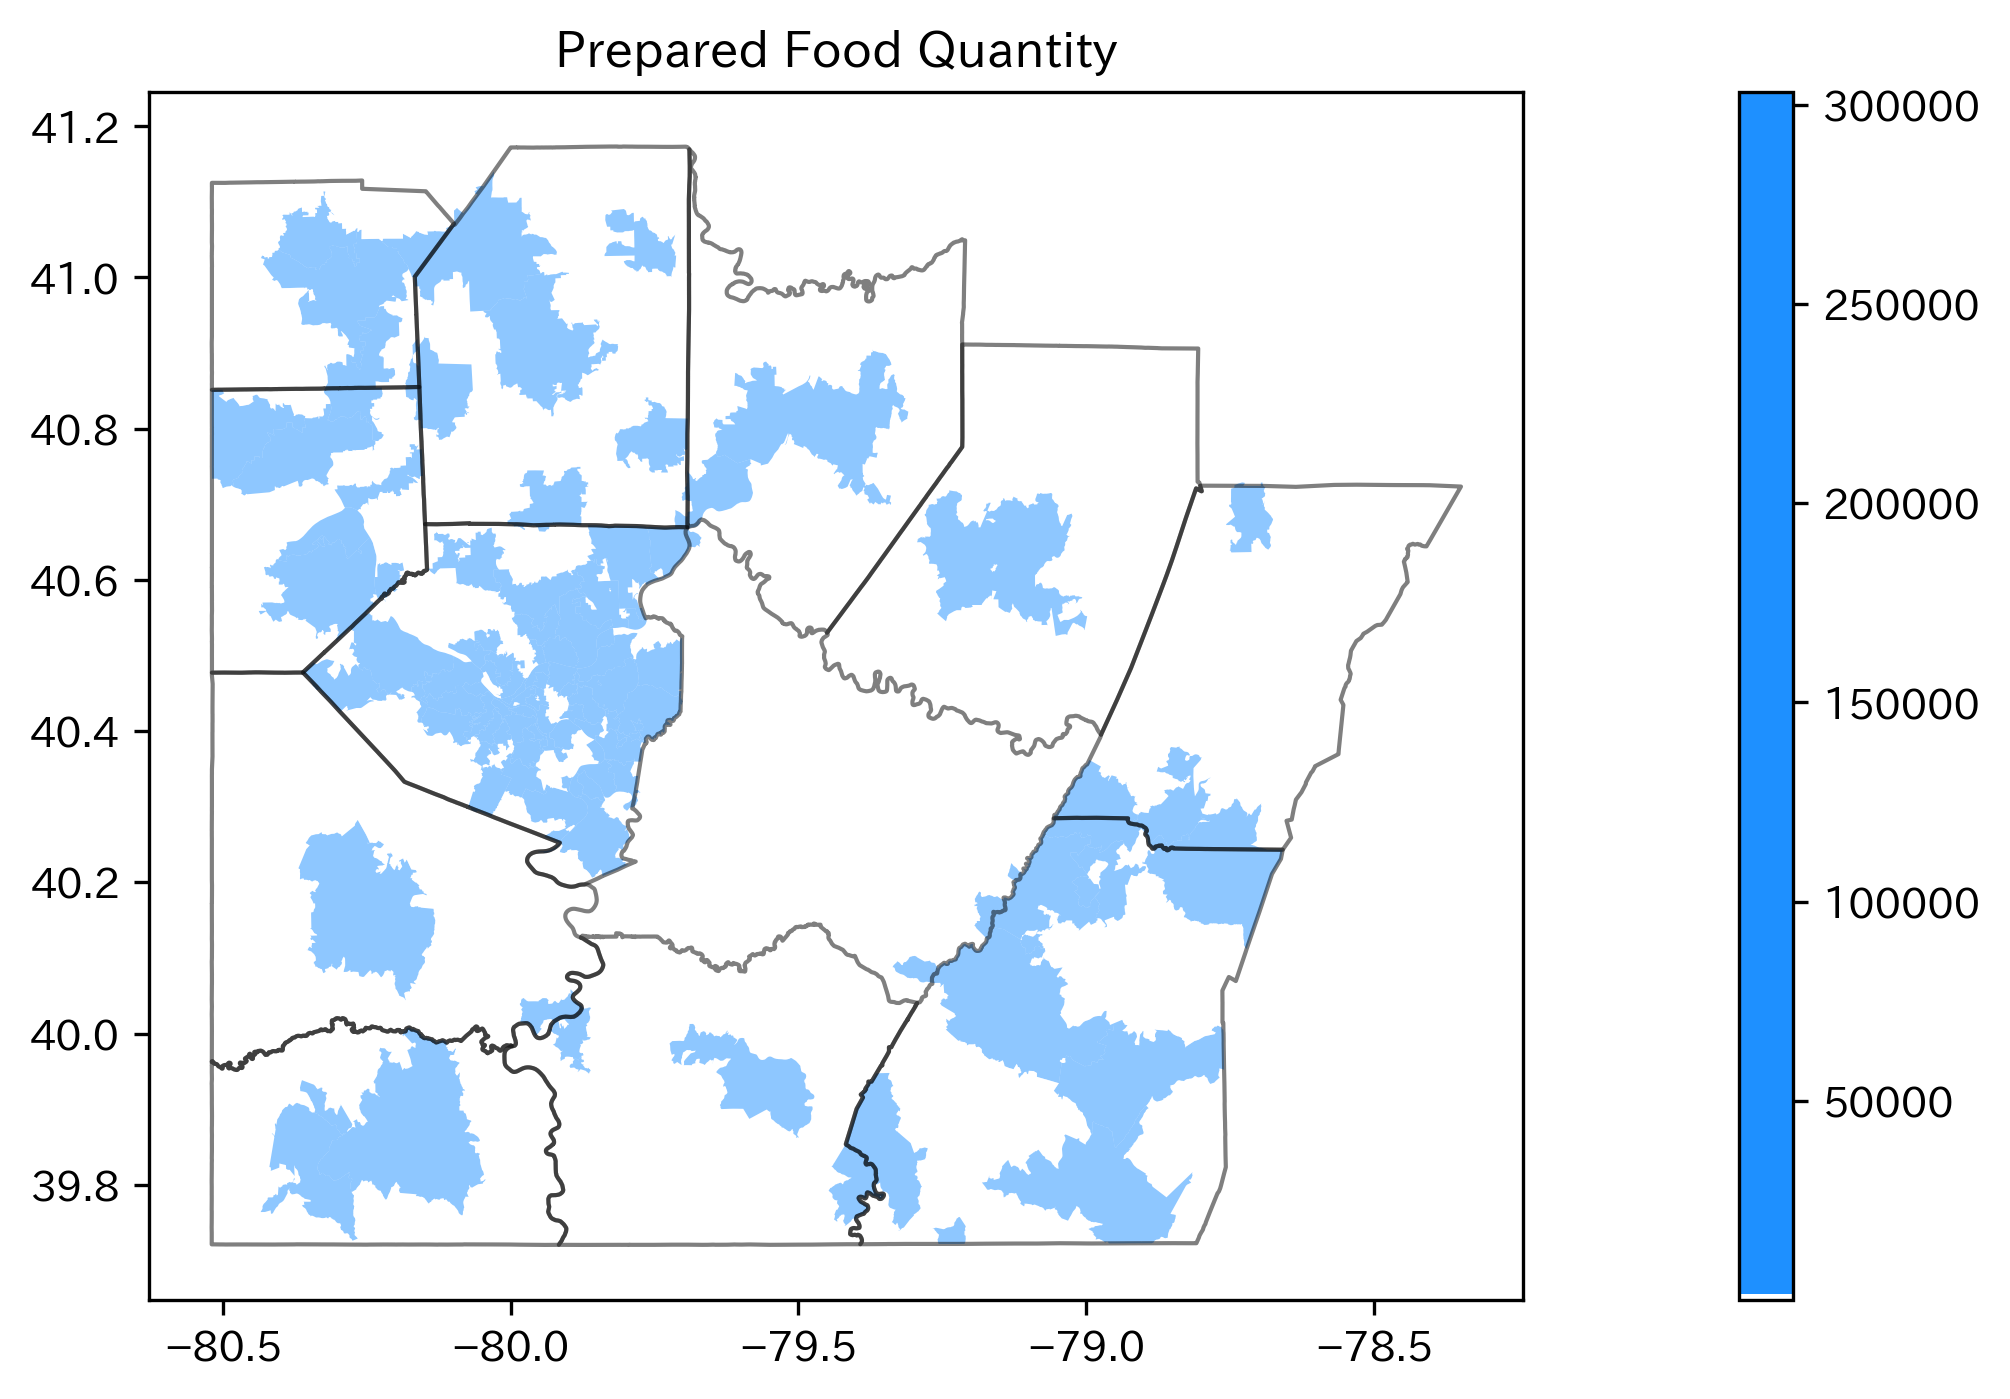

In [307]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Specify the data column name that you want to visualize in color.
data = "ProductQuantity"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Prepared Food Quantity')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf[gdf["Zip"] != 15626].plot(data, ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

In [181]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Specify the data column name that you want to visualize in color.
data = "ProductQuantity"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Prepared Food Quantity')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf[gdf["Zip"] != 15626].plot(data, ax=ax, alpha=0.5, cmap="jet", edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

In [180]:
gdf.describe()

ProductQuantity           Zip
count       130.000000    130.000000
mean      21621.346154  15371.923077
std       42211.980559    380.835019
min          11.000000  15001.000000
25%        1177.000000  15117.000000
50%        7472.000000  15216.500000
75%       21373.750000  15464.000000
max      303347.000000  16646.000000

In [183]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Color mapping
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["white"])

# Specify the data column name that you want to visualize in color.
data = "ProductQuantity"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Prepared Food Quantity')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf[gdf["Zip"] != 15626].plot(data, ax=ax, alpha=0.5, cmap="Blues", edgecolor='k', legend=True, cax=cax, linewidth=0)
gdf[gdf["ProductQuantity"] < 1177].plot(data, ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

## Make CSV


In [351]:
df_s = df_

In [352]:
df_s = df_s[df_s["Zip"] != 17109]
df_s = df_s[df_s["Zip"] != 15626]

KeyError: 'Zip'

In [353]:
df_s.head()

ProductQuantity
Zip                   
15001            20233
15003             8871
15004              174
15005              795
15010             8881

In [354]:
df_d = df_demand

In [355]:
df_d.head()

LILATracts_1And10  LILATracts_halfAnd10  LILATracts_1And20  \
zip                                                                 
15001                  1                     1                  1   
15003                  1                     1                  1   
15004                  0                     0                  0   
15005                  0                     1                  0   
15006                  0                     0                  0   

       LowIncomeTracts  TractLOWI  Total_Population  Risk_Level  
zip                                                              
15001                1      12624             51540           2  
15003                1       5113             18641           2  
15004                0       1461              4567           0  
15005                1       4467             30185           3  
15006                0        989              6883           0

In [356]:
# merge
df_sd = pd.merge(df_s, df_d, left_on="Zip", right_on="zip")

In [357]:
df_sd

ProductQuantity  LILATracts_1And10  LILATracts_halfAnd10  \
0              20233                  1                     1   
1               8871                  1                     1   
2                174                  0                     0   
3                795                  0                     1   
4               8881                  1                     1   
..               ...                ...                   ...   
124              817                  0                     0   
125               11                  0                     0   
126            15982                  0                     1   
127             3199                  1                     1   
128             2367                  1                     1   

     LILATracts_1And20  LowIncomeTracts  TractLOWI  Total_Population  \
0                    1                1      12624             51540   
1                    1                1       5113             18641   
2                    0                0       1461              4567   
3                    0                1       4467             30185   
4                    1                1      15444             55660   
..                 ...              ...        ...               ...   
124                  0                0       1551              7105   
125                  0                0       2488             12087   
126                  0                1      12346             36550   
127                  1                1       4708             22434   
128                  1                1       2730             10810   

     Risk_Level  
0             2  
1             2  
2             0  
3             3  
4             2  
..          ...  
124           0  
125           0  
126           3  
127           2  
128           2  

[129 rows x 8 columns]

In [358]:
df_s2 = df_s

In [359]:
df_sd2 = pd.concat([df_s2, df_d], axis=1)

In [360]:
df_sd2

ProductQuantity  LILATracts_1And10  LILATracts_halfAnd10  \
15001          20233.0                1.0                   1.0   
15003           8871.0                1.0                   1.0   
15004            174.0                0.0                   0.0   
15005            795.0                0.0                   1.0   
15010           8881.0                1.0                   1.0   
...                ...                ...                   ...   
16640              NaN                0.0                   0.0   
16641              NaN                0.0                   0.0   
16644              NaN                0.0                   0.0   
16668              NaN                0.0                   0.0   
16675              NaN                0.0                   0.0   

       LILATracts_1And20  LowIncomeTracts  TractLOWI  Total_Population  \
15001                1.0              1.0    12624.0           51540.0   
15003                1.0              1.0     5113.0           18641.0   
15004                0.0              0.0     1461.0            4567.0   
15005                0.0              1.0     4467.0           30185.0   
15010                1.0              1.0    15444.0           55660.0   
...                  ...              ...        ...               ...   
16640                0.0              1.0     2671.0            9014.0   
16641                0.0              0.0     1716.0            7842.0   
16644                0.0              1.0     1014.0            2577.0   
16668                0.0              1.0     4215.0           17104.0   
16675                0.0              0.0     1657.0            6437.0   

       Risk_Level  
15001         2.0  
15003         2.0  
15004         0.0  
15005         3.0  
15010         2.0  
...           ...  
16640         0.0  
16641         0.0  
16644         0.0  
16668         0.0  
16675         0.0  

[526 rows x 8 columns]

In [370]:
df_sd2 = df_sd2.reset_index()
df_sd2 = df_sd2.rename(columns={'index': 'zip'})

In [227]:
df_sd2.head()

zip  ProductQuantity  LILATracts_1And10  LILATracts_halfAnd10  \
0  15001          20233.0                1.0                   1.0   
1  15003           8871.0                1.0                   1.0   
2  15004            174.0                0.0                   0.0   
3  15005            795.0                0.0                   1.0   
4  15010           8881.0                1.0                   1.0   

   LILATracts_1And20  LowIncomeTracts  TractLOWI  Total_Population  Risk_Level  
0                1.0              1.0    12624.0           51540.0         2.0  
1                1.0              1.0     5113.0           18641.0         2.0  
2                0.0              0.0     1461.0            4567.0         0.0  
3                0.0              1.0     4467.0           30185.0         3.0  
4                1.0              1.0    15444.0           55660.0         2.0

In [361]:
# Shortage level of prepared foods
# df_sd2["Shartage_PF"]=np.nan
df_sd2["Shartage_PF"] = df_sd2.apply(df_sd2['TractLOWI']/df_sd2['ProductQuantity'], axis=1)

AssertionError: 

In [362]:
df_sd2.dtypes

ProductQuantity         float64
LILATracts_1And10       float64
LILATracts_halfAnd10    float64
LILATracts_1And20       float64
LowIncomeTracts         float64
TractLOWI               float64
Total_Population        float64
Risk_Level              float64
dtype: object

In [363]:
df_sd2.describe()

ProductQuantity  LILATracts_1And10  LILATracts_halfAnd10  \
count       131.000000         524.000000            524.000000   
mean      21463.992366           0.219466              0.295802   
std       42087.864550           0.414280              0.456838   
min          11.000000           0.000000              0.000000   
25%        1153.500000           0.000000              0.000000   
50%        7455.000000           0.000000              0.000000   
75%       21250.500000           0.000000              1.000000   
max      303347.000000           1.000000              1.000000   

       LILATracts_1And20  LowIncomeTracts     TractLOWI  Total_Population  \
count         524.000000       524.000000    524.000000        524.000000   
mean            0.219466         0.576336   3665.788168      15366.790076   
std             0.414280         0.494611   3612.804446      15792.134576   
min             0.000000         0.000000      0.000000        936.000000   
25%             0.000000         0.000000   1185.500000       4874.000000   
50%             0.000000         1.000000   2485.500000       9374.000000   
75%             0.000000         1.000000   4724.250000      19061.250000   
max             1.000000         1.000000  22192.000000      96031.000000   

       Risk_Level  
count  524.000000  
mean     0.667939  
std      1.058717  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      2.000000  
max      3.000000

In [234]:
df_sd2["TractLOWI"].unique()

array([12624.,  5113.,  1461.,  4467., 15444.,  1125.,  5772.,  3521.,
        7892.,  3051.,  1117.,  2096.,  3710.,  1690.,   424.,  7433.,
        3497.,  5597.,  5239.,  4481.,  1504.,  5324.,  2291.,  7538.,
         695.,  4965.,  7961.,  6749.,  7948.,  8884., 12780.,  5303.,
        5644.,  8135.,  8921.,  5735.,  3789.,  5710., 16955.,  1972.,
       11337.,  4864.,  1888.,  4381.,  1286.,  6962., 13560., 10382.,
        5057.,  4902.,  9611.,  7951.,  5243., 11351., 19581.,  7240.,
        8612.,  7160., 20373.,  6435., 14430., 15359.,  9717.,  4304.,
        9397., 10516.,  5244., 13930., 12578., 18162.,  2111.,  5314.,
        8413.,  9891., 11372.,  6714.,  5629.,  4181., 17110., 17669.,
       12473.,  4544.,  6700.,  2964., 22192.,  9545.,  3861.,  1936.,
        2315., 10423.,  1148.,  8916.,  2151.,  4844.,  4848., 14337.,
        3750.,  2599., 11048.,  3939.,  4411.,  5394.,  3996.,    nan,
       15257.,  6822.,  8685.,  2835.,  6381.,  6103., 16304.,  3262.,
      

In [235]:
df_sd2["ProductQuantity"].unique()

array([2.02330e+04, 8.87100e+03, 1.74000e+02, 7.95000e+02, 8.88100e+03,
       1.10200e+03, 6.40000e+01, 2.55992e+05, 2.58620e+04, 3.60000e+01,
       5.69000e+02, 6.99400e+03, 3.67000e+04, 1.28880e+04, 7.10000e+01,
       3.70000e+01, 6.48000e+02, 3.03347e+05, 1.98000e+02, 2.54800e+04,
       1.08100e+03, 1.81800e+03, 1.20000e+03, 1.69100e+03, 4.37000e+02,
       1.64450e+04, 2.25750e+04, 2.95900e+04, 2.10040e+04, 1.12810e+04,
       1.12574e+05, 9.97260e+04, 3.40500e+03, 5.05600e+04, 1.19800e+03,
       4.04300e+03, 7.26000e+02, 1.44770e+04, 6.94770e+04, 1.67200e+04,
       7.71600e+03, 8.15300e+03, 1.97500e+03, 3.14100e+04, 2.97800e+03,
       8.41200e+03, 2.14970e+04, 8.66380e+04, 1.56600e+03, 6.03000e+03,
       7.64300e+03, 8.54600e+03, 1.72470e+04, 6.82100e+03, 1.03964e+05,
       5.03580e+04, 4.18150e+04, 4.61000e+02, 5.36910e+04, 3.87000e+03,
       1.27289e+05, 1.61190e+04, 1.63920e+04, 1.58400e+03, 5.25500e+03,
       1.17000e+03, 1.44830e+04, 9.38660e+04, 5.32200e+03, 1.220

In [239]:
df_sd2.dropna(subset=['TractLOWI'], inplace=True)

In [ ]:
df_sd2.dropna(subset=['TractLOWI'] inplace=True)

In [240]:
df_sd2.describe()

zip  ProductQuantity  LILATracts_1And10  LILATracts_halfAnd10  \
count    524.000000       129.000000         524.000000            524.000000   
mean   15563.980916     21665.418605           0.219466              0.295802   
std      410.054555     42373.547572           0.414280              0.456838   
min    15001.000000        11.000000           0.000000              0.000000   
25%    15229.750000      1170.000000           0.000000              0.000000   
50%    15463.500000      7455.000000           0.000000              0.000000   
75%    15925.250000     21497.000000           0.000000              1.000000   
max    16675.000000    303347.000000           1.000000              1.000000   

       LILATracts_1And20  LowIncomeTracts     TractLOWI  Total_Population  \
count         524.000000       524.000000    524.000000        524.000000   
mean            0.219466         0.576336   3665.788168      15366.790076   
std             0.414280         0.494611   3612.804446      15792.134576   
min             0.000000         0.000000      0.000000        936.000000   
25%             0.000000         0.000000   1185.500000       4874.000000   
50%             0.000000         1.000000   2485.500000       9374.000000   
75%             0.000000         1.000000   4724.250000      19061.250000   
max             1.000000         1.000000  22192.000000      96031.000000   

       Risk_Level  Shartage_PF  
count  524.000000          0.0  
mean     0.667939          NaN  
std      1.058717          NaN  
min      0.000000          NaN  
25%      0.000000          NaN  
50%      0.000000          NaN  
75%      2.000000          NaN  
max      3.000000          NaN

In [364]:
# Shortage level of prepared foods
# df_sd2["Shartage_PF"]=np.nan
df_sd2["Shartage_PF"] = df_sd2['TractLOWI']/df_sd2['ProductQuantity']

In [365]:
df_sd2.head()

ProductQuantity  LILATracts_1And10  LILATracts_halfAnd10  \
15001          20233.0                1.0                   1.0   
15003           8871.0                1.0                   1.0   
15004            174.0                0.0                   0.0   
15005            795.0                0.0                   1.0   
15010           8881.0                1.0                   1.0   

       LILATracts_1And20  LowIncomeTracts  TractLOWI  Total_Population  \
15001                1.0              1.0    12624.0           51540.0   
15003                1.0              1.0     5113.0           18641.0   
15004                0.0              0.0     1461.0            4567.0   
15005                0.0              1.0     4467.0           30185.0   
15010                1.0              1.0    15444.0           55660.0   

       Risk_Level  Shartage_PF  
15001         2.0     0.623931  
15003         2.0     0.576372  
15004         0.0     8.396552  
15005         3.0     5.618868  
15010         2.0     1.738993

In [366]:
df_sd2 = df_sd2.rename(columns={'Shartage_PF': 'Shortage_PF'})

In [367]:
df_sd2.to_csv("./20220215_output_2.csv")

In [371]:
df_sd2.head()

zip  ProductQuantity  LILATracts_1And10  LILATracts_halfAnd10  \
0  15001          20233.0                1.0                   1.0   
1  15003           8871.0                1.0                   1.0   
2  15004            174.0                0.0                   0.0   
3  15005            795.0                0.0                   1.0   
4  15010           8881.0                1.0                   1.0   

   LILATracts_1And20  LowIncomeTracts  TractLOWI  Total_Population  \
0                1.0              1.0    12624.0           51540.0   
1                1.0              1.0     5113.0           18641.0   
2                0.0              0.0     1461.0            4567.0   
3                0.0              1.0     4467.0           30185.0   
4                1.0              1.0    15444.0           55660.0   

   Risk_Level  Shortage_PF  
0         2.0     0.623931  
1         2.0     0.576372  
2         0.0     8.396552  
3         3.0     5.618868  
4         2.0     1.738993

In [372]:
# add geo-data
df_ = pd.merge(df_sd2, df_geo[["ZCTA5CE20", "geometry"]], left_on="zip", right_on="ZCTA5CE20")

In [373]:
# pandas -> geopandas 
gdf = gpd.GeoDataFrame(df_, geometry='geometry') 

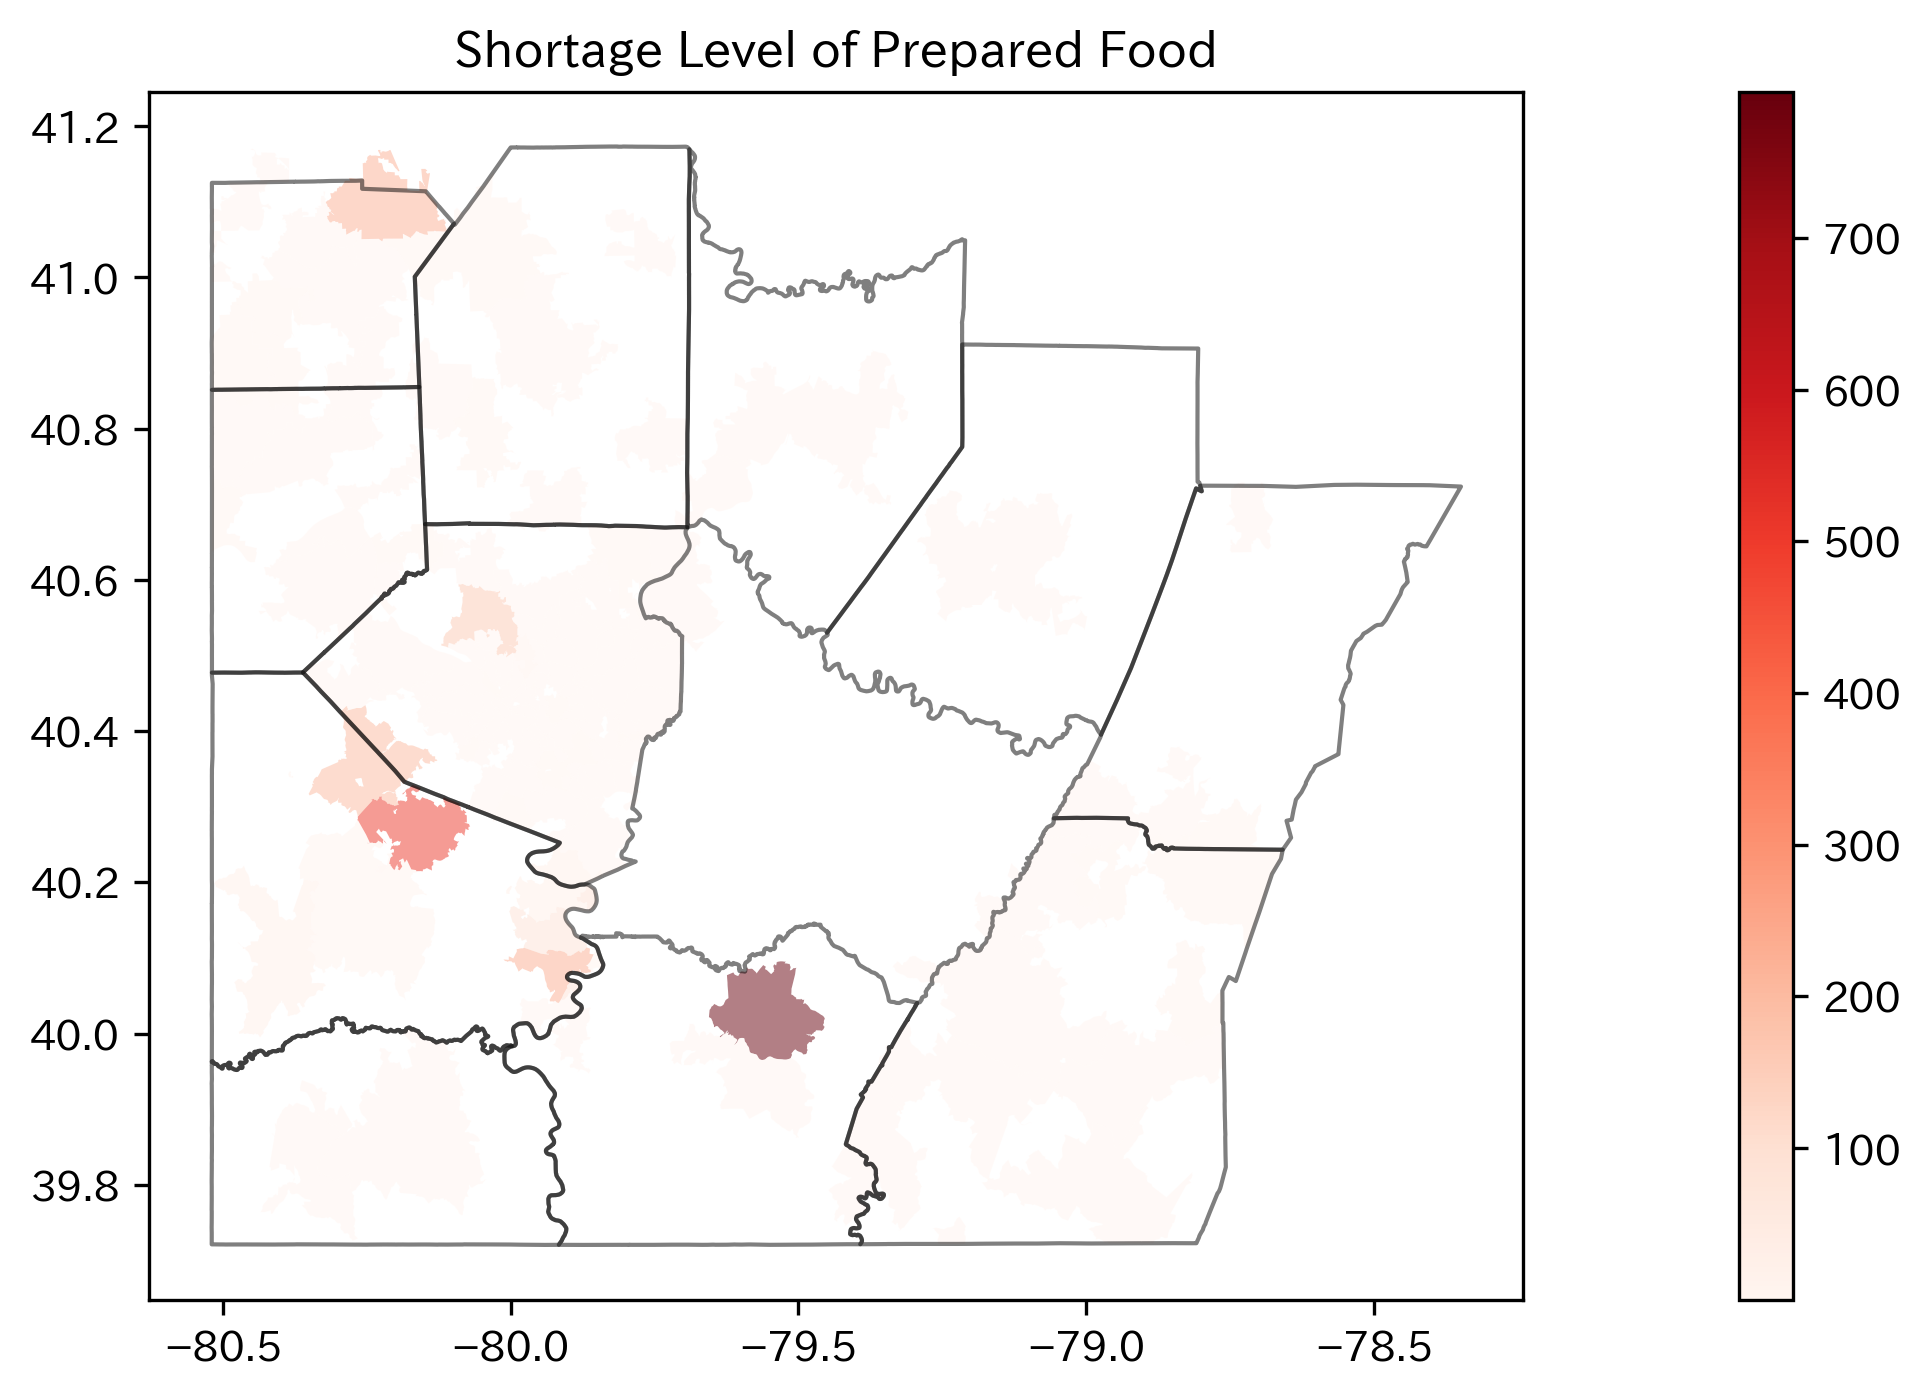

In [247]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Specify the data column name that you want to visualize in color.
data = "Shortage_PF"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Shortage Level of Prepared Food')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap="Reds", edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

In [248]:
gdf.describe()

zip  ProductQuantity  LILATracts_1And10  LILATracts_halfAnd10  \
count    488.000000       129.000000         488.000000            488.000000   
mean   15570.858607     21665.418605           0.233607              0.307377   
std      409.926555     42373.547572           0.423559              0.461880   
min    15001.000000        11.000000           0.000000              0.000000   
25%    15226.750000      1170.000000           0.000000              0.000000   
50%    15469.500000      7455.000000           0.000000              0.000000   
75%    15928.250000     21497.000000           0.000000              1.000000   
max    16675.000000    303347.000000           1.000000              1.000000   

       LILATracts_1And20  LowIncomeTracts     TractLOWI  Total_Population  \
count         488.000000       488.000000    488.000000        488.000000   
mean            0.233607         0.592213   3846.450820      16129.590164   
std             0.423559         0.491927   3671.887774      16083.813177   
min             0.000000         0.000000    249.000000        936.000000   
25%             0.000000         0.000000   1373.750000       4992.500000   
50%             0.000000         1.000000   2671.000000      10715.500000   
75%             0.000000         1.000000   4884.500000      20682.500000   
max             1.000000         1.000000  22192.000000      96031.000000   

       Risk_Level  Shortage_PF     ZCTA5CE20  
count  488.000000   129.000000    488.000000  
mean     0.688525    20.481211  15570.858607  
std      1.061416    89.622087    409.926555  
min      0.000000     0.013754  15001.000000  
25%      0.000000     0.352647  15226.750000  
50%      0.000000     0.930377  15469.500000  
75%      2.000000     3.229246  15928.250000  
max      3.000000   796.500000  16675.000000

In [249]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Specify the data column name that you want to visualize in color.
data = "Shortage_PF"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Shortage Level of Prepared Food')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap="jet", edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

In [299]:
cl

['white',
 'white',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaaa',
 '#ffaaa

In [305]:
# for product weight
cl = []
for i in range(1000):
    if i <= 4: # 25 percentile
        cl.append("white")
    elif 1 <= 24: # 50 percentile
        cl.append("#1e90ff")
    elif 1 <= 70: # 75 percentile
        cl.append("#0000cd")
    else: # 100 percentile
        cl.append("#191970")
        

In [378]:
# for Shortage Level
cl = []
for i in range(1000):
    if i <= 1: # 25 percentile
        cl.append("white")
    elif 1 <= 4: # 50 percentile
        cl.append("#ffaaaa")
    elif 1 <= 4: # 75 percentile
        cl.append("#ff0000")
    else: # 100 percentile
        cl.append("#8b0000")
        

In [379]:
# Color mapping
# 0.93の色を濃くするにはどうするべきか。 MAX:796
from matplotlib.colors import ListedColormap
cmap = ListedColormap(cl)

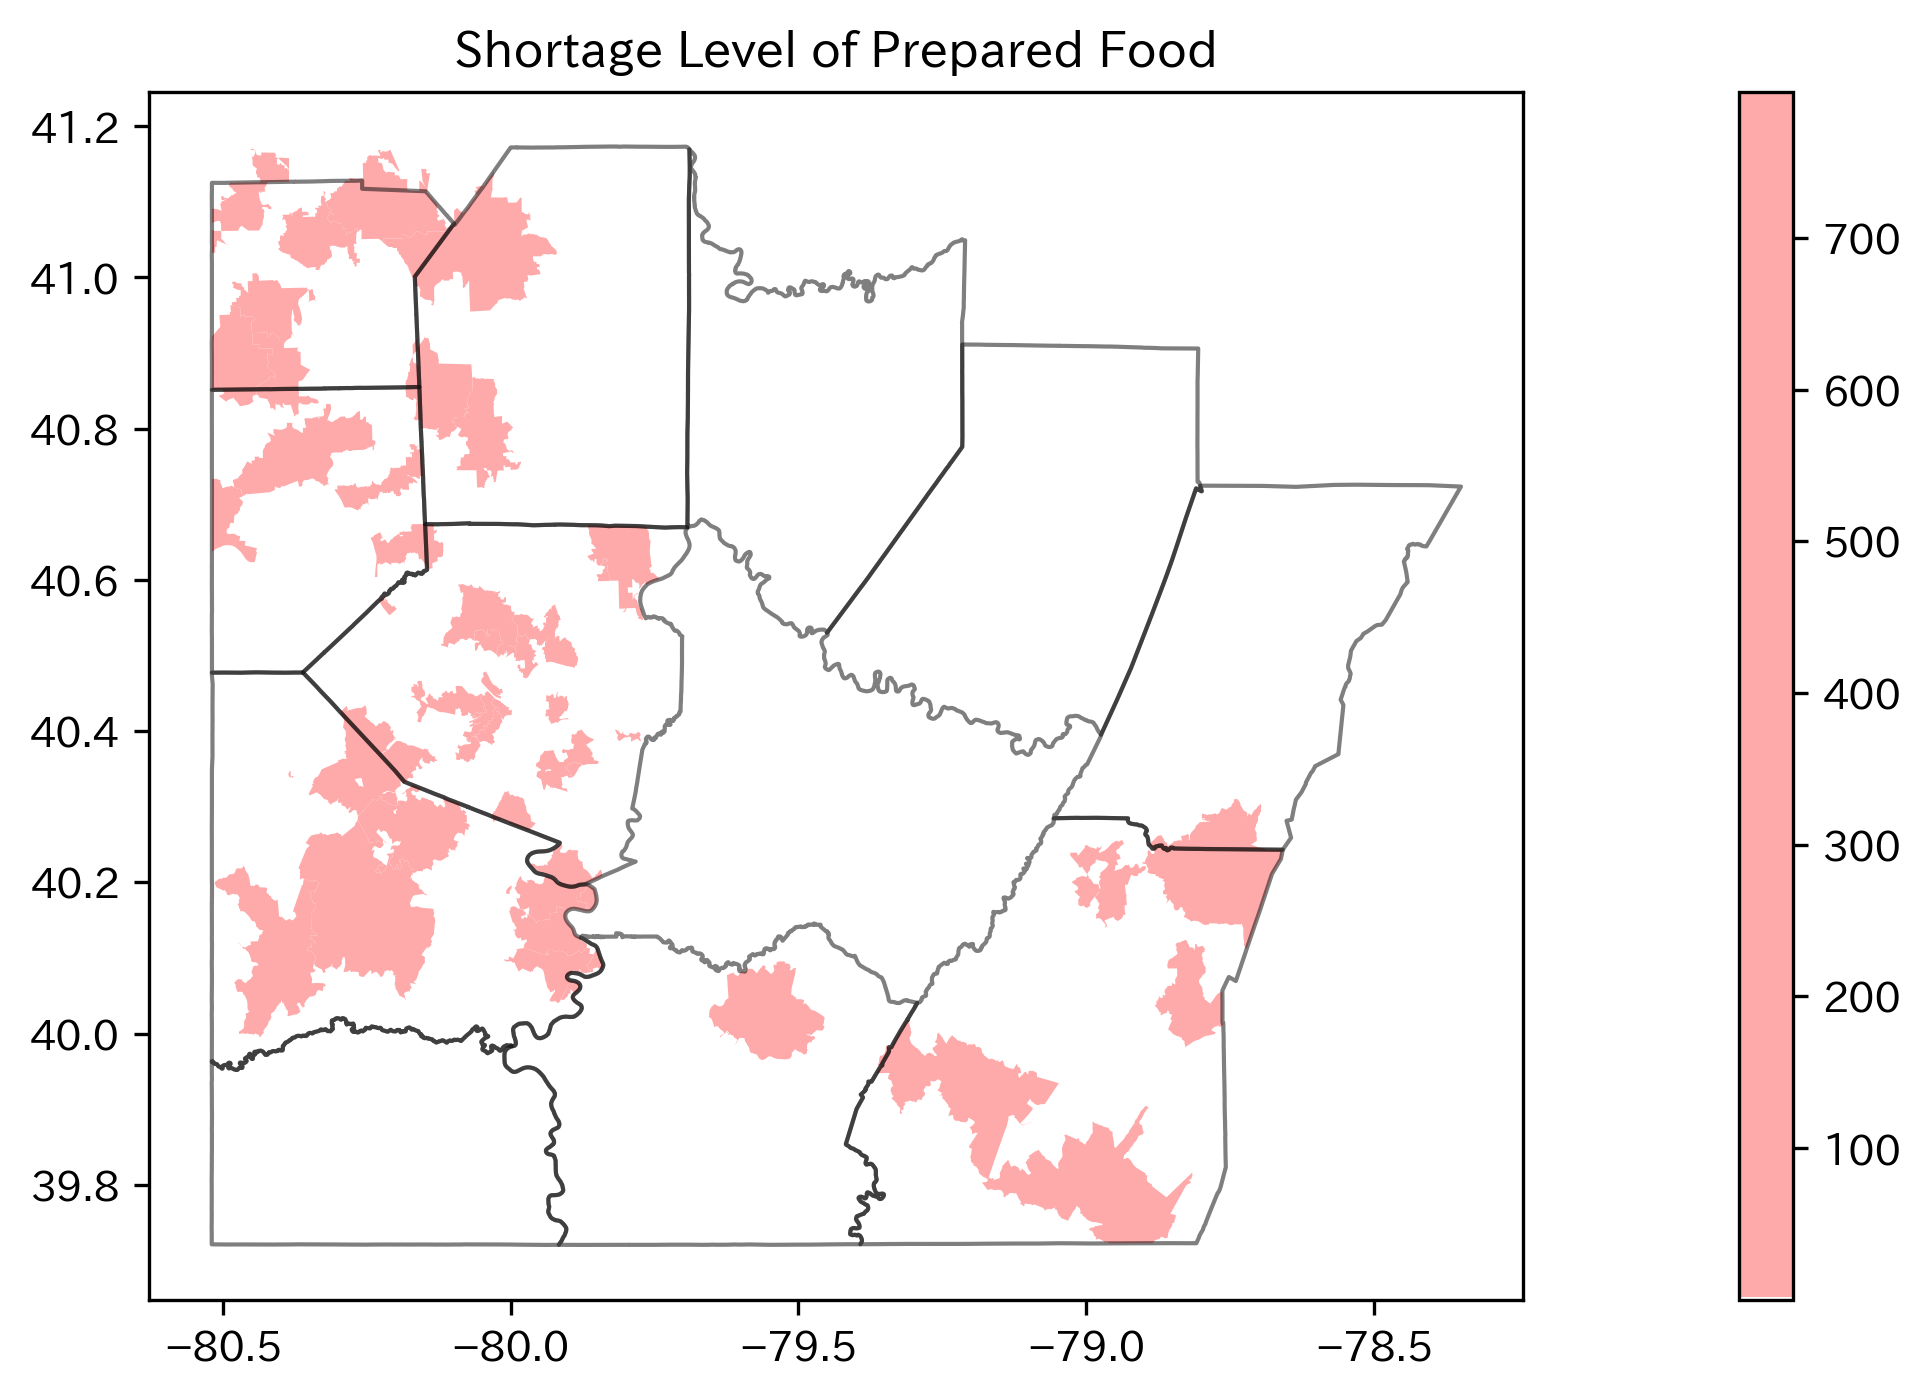

In [386]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Specify the data column name that you want to visualize in color.
data = "Shortage_PF"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Shortage Level of Prepared Food')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=1, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()